<a href="https://colab.research.google.com/github/arief-sys/UAS-KecerdasanBuatan/blob/main/notebook_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [203]:
df = pd.read_csv('/content/top50.csv', encoding='ISO-8859-1')
df

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [205]:
df.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [206]:
df.dtypes

,0
Unnamed: 0,int64
Track.Name,object
Artist.Name,object
Genre,object
Beats.Per.Minute,int64
Energy,int64
Danceability,int64
Loudness..dB..,int64
Liveness,int64
Valence.,int64


In [207]:
df.isna().sum()

,0
Unnamed: 0,0
Track.Name,0
Artist.Name,0
Genre,0
Beats.Per.Minute,0
Energy,0
Danceability,0
Loudness..dB..,0
Liveness,0
Valence.,0


In [208]:
# --- Pilih Fitur Numerik untuk Clustering ---
fitur_numerik = [
    'Beats.Per.Minute', 'Energy', 'Danceability', 'Loudness..dB..',
    'Valence.', 'Acousticness..', 'Speechiness.', 'Liveness',
]
X = df[fitur_numerik]

In [209]:
# --- Normalisasi Fitur ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

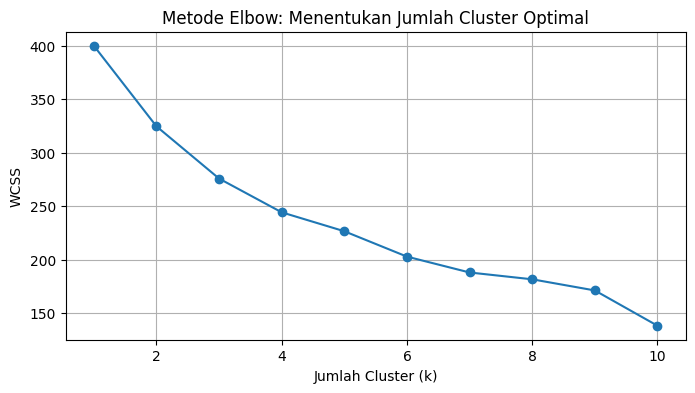

In [210]:
# --- Menentukan Jumlah Cluster Optimal (Elbow Method) ---
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow: Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [211]:
# --- Klasterisasi dengan K=3 ---
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Tambahkan hasil klaster ke DataFrame
df['Cluster'] = clusters

In [212]:
# --- Analisis Karakteristik Tiap Cluster ---
df.groupby('Cluster')[fitur_numerik].mean().style.background_gradient(cmap='viridis')

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Valence.,Acousticness..,Speechiness.,Liveness
Cluster,,,,,,,,
0,110.882353,48.058824,70.823529,-7.470588,44.294118,32.000000,12.882353,12.117647
1,106.666667,73.500000,73.708333,-4.875000,64.166667,15.583333,7.875000,17.541667
2,173.111111,69.111111,66.222222,-4.333333,48.555556,21.111111,24.000000,11.777778


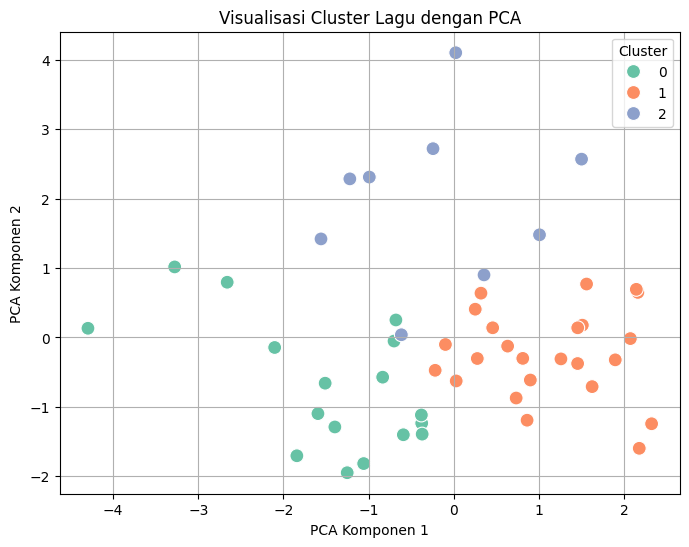

In [213]:
# --- Visualisasi Cluster dengan PCA (2D) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Visualisasi Cluster Lagu dengan PCA')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.grid(True)
plt.show()

In [214]:
# --- Tampilkan 5 Lagu Teratas Tiap Cluster ---
for i in range(k):
    print(f"\n🎵 Cluster {i} - Contoh Lagu:")
    display(df[df['Cluster'] == i][['Track.Name', 'Artist.Name', 'Genre', 'Popularity']].head())


🎵 Cluster 0 - Contoh Lagu:


,Track.Name,Artist.Name,Genre,Popularity
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,86
9,bad guy,Billie Eilish,electropop,95
12,Someone You Loved,Lewis Capaldi,pop,88
14,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,92
15,No Guidance (feat. Drake),Chris Brown,dance pop,82



🎵 Cluster 1 - Contoh Lagu:


,Track.Name,Artist.Name,Genre,Popularity
0,Señorita,Shawn Mendes,canadian pop,79
1,China,Anuel AA,reggaeton flow,92
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,84
7,How Do You Sleep?,Sam Smith,pop,90
8,Old Town Road - Remix,Lil Nas X,country rap,87



🎵 Cluster 2 - Contoh Lagu:


,Track.Name,Artist.Name,Genre,Popularity
2,boyfriend (with Social House),Ariana Grande,dance pop,85
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,94
6,Ransom,Lil Tecca,trap music,92
10,Callaita,Bad Bunny,reggaeton,93
13,Otro Trago - Remix,Sech,panamanian pop,87
